# Onde ocorrem as Violations e Infractions?

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import folium
import contextily as ctx
import warnings
import datetime
from datetime import date
import seaborn as sns
warnings.simplefilter(action='ignore')

In [3]:
offense_little = pd.read_csv("offense_little.csv")
crimes_filtered = pd.read_csv("crimes_filtered.csv")

In [4]:
little_crimes_map= folium.Map (location = [40.730610, -73.935242], zoom_start = 10.4)
for indice, row in offense_little.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        icon=folium.Icon(color="red", icon="info-sign"),
        popup= row ["ofns_desc"]
    ).add_to(little_crimes_map)

In [ ]:
little_crimes_map

## Construindo heatmap de crimes de acordo com a semana

In [5]:
crimes_week = []
for i in crimes_filtered['arrest_date']:
    week = date.fromisoformat(i).strftime('%W') 
    crimes_week.append(week)

In [6]:
crimes_filtered['week']=crimes_week
crimes_filtered.head()

,Unnamed: 0,arrest_date,pd_code,ofns_desc,law_code,lvl_offense,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,comm_distr,boro_bound,cty_counc_ditr,pd_precinct,week
0,0,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,Black,40.800694,-73.941109,Manhattan,25.0,0.0,7.0,4.0,36.0,16.0,03
1,1,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,Unknown,40.757839,-73.991212,Manhattan,14.0,0.0,12.0,4.0,10.0,8.0,05
2,6,2019-04-23,RAPE 1,RAPE,PL 1303501,Felony,45-64,M,Black Hispanic,40.674583,-73.930222,Kings,77.0,0.0,16.0,2.0,49.0,49.0,16
3,7,2019-05-04,"SEXUAL ABUSE 3,2",SEX CRIMES,PL 13052A1,Misdemeanor,25-44,M,Black,40.883383,-73.902333,Bronx,50.0,0.0,48.0,5.0,40.0,33.0,17
4,11,2019-07-16,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,Felony,45-64,M,Black,40.675492,-73.800926,Queens,113.0,0.0,41.0,3.0,46.0,71.0,28


Adicionando a coluna semana ao dataframe

In [7]:
crimes_per_week = crimes_filtered.groupby(['week', 'arrest_boro']).size().reset_index(name='count')
crimes_per_week['week']=pd.to_numeric(crimes_per_week['week'])
crimes_per_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week         265 non-null    int64 
 1   arrest_boro  265 non-null    object
 2   count        265 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ KB


In [8]:
heat_week = crimes_per_week.pivot('arrest_boro','week', "count")
heat_week

week,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
arrest_boro,,,,,,,,,,,,,,,,,,,,,
Bronx,622,772,719,615,620,686,672,604,661,729,...,475,546,547,605,440,520,494,384,318,84
Kings,696,808,837,888,768,829,736,702,727,720,...,625,671,643,603,478,611,570,510,424,100
Manhattan,681,770,695,737,607,775,707,650,622,645,...,573,586,529,644,449,608,554,511,371,86
Queens,501,591,606,607,542,635,518,522,535,562,...,471,510,469,540,442,455,435,439,307,80
Staten Island,105,119,159,144,111,149,102,101,119,104,...,74,89,97,94,72,110,107,71,54,12


Contando os crimes semanais em cada um dos boroughs 

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

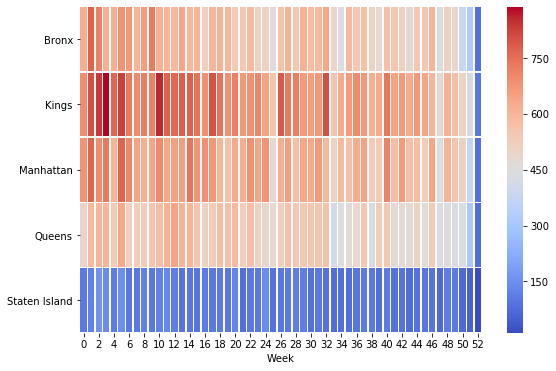

In [21]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat_week, fmt="d", linewidths=.3, ax=ax, cmap="coolwarm")
sns.color_palette("mako")
plt.xlabel("Week")
plt.ylabel("")
plt.yticks(rotation = 0)

## Para as semanas dos principais feriados americanos

In [24]:
week_Christmas = date.fromisoformat('2019-12-25').strftime('%W') 
week_thxs = date.fromisoformat('2019-11-28').strftime('%W') 
week_indep = date.fromisoformat('2019-06-04').strftime('%W') 
week_Christmas, week_thxs, week_indep

('51', '47', '22')

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

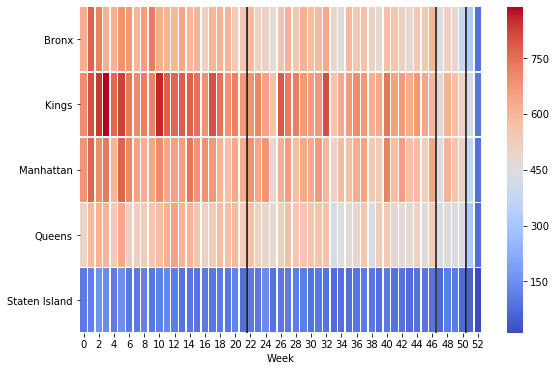

In [29]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat_week, fmt="d", linewidths=.3, ax=ax, cmap="coolwarm")
plt.axvline(22, *ax.get_ylim(),color="black")
plt.axvline(47, *ax.get_ylim(),color="black")
plt.axvline(51, *ax.get_ylim(),color="black")
plt.xlabel("Week")
plt.ylabel("")
plt.yticks(rotation = 0)

Na maioria das vezes, os crimes reportados diminuíram. Isso não acontece com o feriado de Independência no Bronx, Manhattan e Queens